# Red cell counter (Granulometry)

Using morphological operators

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Util

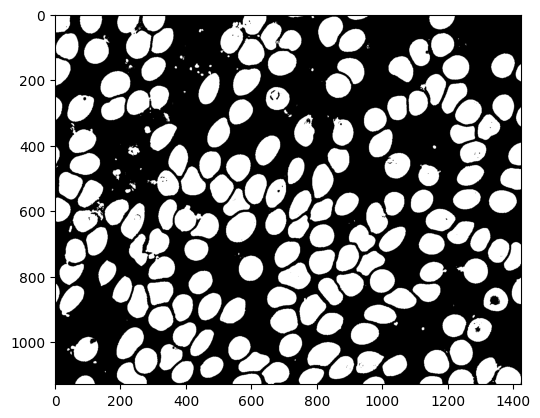

In [2]:
image = cv2.imread("../../images/BloodCells.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
image = np.logical_not(image)
plt.imshow(image, cmap="gray")


In [3]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [4]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [5]:
def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return c

## Cell counter

In [6]:
def countCells():
    print("counting...")

## Morphological Operations

In [7]:
def dilate(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter > 0
    return nImg

In [8]:
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1 #Doesn't work for borders yet
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg

In [9]:
def open(img, struct_array):
    eroded = erode(img, struct_array)
    dilated = dilate(eroded, struct_array)
    return dilated

In [10]:
def close(img, struct_array):
    dilated = dilate(img, struct_array)
    eroded = erode(dilated, struct_array)
    return eroded

In [11]:
# Main cell

In [12]:

structural = [  [0,0,0,0,1,1,0,0,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,0,0,1,1,0,0,0,0]]
"""
structural = [
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]                
"""

structural = np.array(structural)
width = structural.shape[0]
print(structural.shape)

(10, 10)


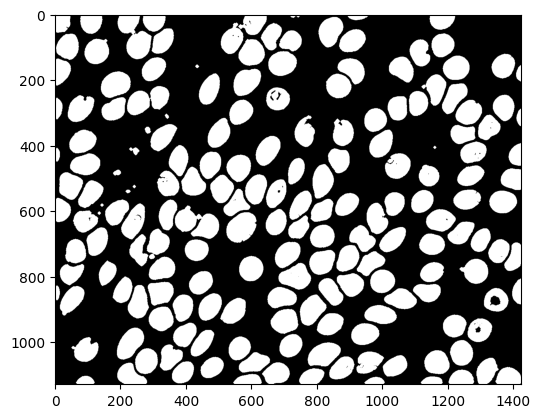

In [13]:
#c = close(image, np.array(structural_array(structural, [5, 5])))
o = open(image, np.array(structural_array(structural, [5, 5])))
plt.imshow(o, cmap="gray")

In [14]:

#o = open(image, np.array(structural_array(structural, [1, 1])))
e = erode(c, np.array(structural_array(structural, [5, 5])))
plt.imshow(e, cmap="gray")

# width = 3
# print( structural_array(np.ones((3, width)), [0, width//2]) )
# o = open(image, np.array(structural_array(np.ones((3, width)), [0, width//2])))
# eo = erode(o, np.array(structural_array(np.ones((3, width)), [0, width//2])))
# plt.imshow(o, cmap="gray")


NameError: name 'c' is not defined